### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

#### 라이브러리 로드 

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
def load_dataset():
    """
    붓꽃 데이터셋 리턴
    """
    iris = load_iris()
    cols = [feature.replace(' (cm)', '') for feature in iris.feature_names]
    irisDF = pd.DataFrame(data=iris.data, columns = cols)
    return irisDF, iris

irisDF, iris = load_dataset()

In [3]:
irisDF.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**KMeans 객체를 생성하고 군집화 수행**

In [4]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

**label_속성을 통해 각 데이터 포인트 별로 할당된 군집 중심점(Centroid)확인하고 irisDF에 `cluster`컬럼으로 추가**

In [5]:
display(f"Ceteroid : {kmeans.labels_}")
display(irisDF.shape, kmeans.labels_.shape)
display(kmeans.predict(irisDF))
display(iris.target_names)

'Ceteroid : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0\n 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2\n 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2\n 2 0]'

(150, 4)

(150,)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
irisDF['cluster'] = kmeans.labels_
irisDF['target'] = iris.target

#군집별로 붓꽃의 종류별 군집 정도 확인
iris_result = irisDF.groupby(['target', 'cluster'])["sepal length"].count()
display(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length, dtype: int64

**2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA값으로 각 데이터 차원축소**

In [7]:
#보통 군집화의 시각화를 위해서는 차원축소후 시각화
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
#display(pca_transformed, pca_transformed.shape)

irisDF["pca_x"] = pca_transformed[:, 0]
irisDF["pca_y"] = pca_transformed[:, 1]
irisDF.head(3)

,sepal length,sepal width,petal length,petal width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


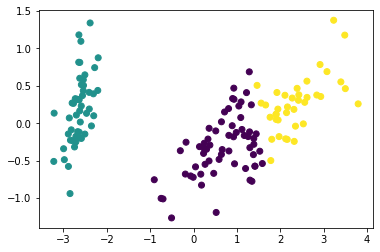

In [8]:
plt.scatter(x=irisDF.loc[:, "pca_x"], y=irisDF.loc[:, "pca_y"], c = irisDF['cluster'])
plt.show()

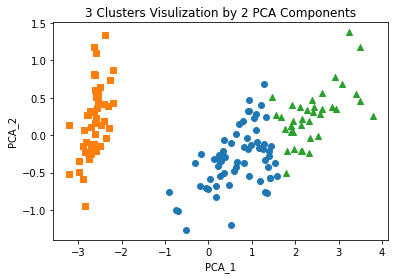

In [9]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF["cluster"]==0].index
marker1_ind = irisDF[irisDF["cluster"]==1].index
marker2_ind = irisDF[irisDF["cluster"]==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind, "pca_x"], y=irisDF.loc[marker0_ind, "pca_y"], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, "pca_x"], y=irisDF.loc[marker1_ind, "pca_y"], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, "pca_x"], y=irisDF.loc[marker2_ind, "pca_y"], marker='^')

plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.title("3 Clusters Visulization by 2 PCA Components")
plt.show()

### Clustering 알고리즘 테스트를 위한 데이터 생성 
* cluster_std값을 변경해보면서 비교

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features = 2, centers=3, cluster_std=0.4, random_state=0)
print(X.shape, y.shape)

# y타겟값의 분포 확인
unique, counts = np.unique(y, return_counts=True)

display(f"Unique number : {unique}, Counts : {counts}")

(200, 2) (200,)


'Unique number : [0 1 2], Counts : [67 67 66]'

* n_samples: 생성할 총 데이터의 개수입니다. 디폴트는 100개입니다.  


* n_features: 데이터의 피처 개수입니다. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처
는 y 좌표상에 표현합니다.  


* centers: int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타냅니다. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군
집 중심점의 좌표를 의미합니다.  


* cluster_std: 생성될 군집 데이터의 표준 편차를 의미합니다. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이
터가 표준편차 0.8을 가진 값으로 만들어집니다.   
[0.8, 1,2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내
데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 만듭
니다.   
군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용합니다  

In [33]:
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=["ftr1", "ftr2"])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.609665,3.269954,2
1,0.837105,4.366327,0
2,1.038249,4.455052,0


**make_blob()으로 만들어진 데이터 포인트들을 시각화**

array([0, 1, 2])

(3,)

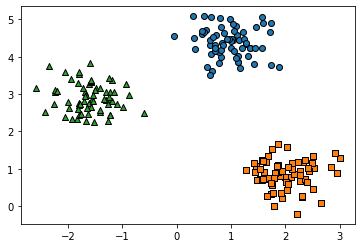

In [34]:
target_list = np.unique(y)
display(target_list, target_list.shape)

# 각 타겟의 값을 마커를 찾기위한 인덱스값으로 활용
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 3개의 cluster 영역으로 구분한 데이터 셋을 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster["ftr1"], y=target_cluster["ftr2"], edgecolor='k', marker=markers[target])
plt.show()

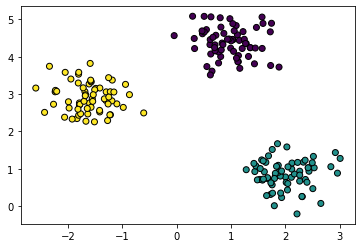

In [35]:
target_list = np.unique(y)
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c = y)

**K-Means 클러스터링을 수행하고 개별 클러스터의 중심 위치를 시각화**

In [36]:
display(X[:10,:],X.shape)

array([[-1.60966548,  3.26995383],
       [ 0.83710522,  4.36632692],
       [ 1.03824905,  4.45505234],
       [-1.48781403,  3.15106373],
       [ 1.09556535,  4.83434169],
       [-1.21760282,  2.44433001],
       [ 2.26369347,  0.66734847],
       [ 1.85605454,  1.66947648],
       [ 1.02703492,  4.46458307],
       [-1.60316541,  2.75994246]])

(200, 2)

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 1])

(200,)

'Unique Labels : [0 1 2]'

,ftr1,ftr2,target,kmeans_label
0,-1.609665,3.269954,2,2
1,0.837105,4.366327,0,0
2,1.038249,4.455052,0,0


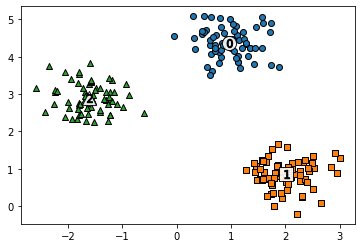

In [37]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_label = kmeans.fit_predict(X)  # 클러스터링 수행
display(cluster_label, cluster_label.shape)

clusterDF['kmeans_label'] = cluster_label

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_ #중심위치 좌표(Centroid)
unique_labels = np.unique(cluster_label)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
display(f"Unique Labels : {unique_labels}")
display(clusterDF.head(3))

#군집된 Label의 유형값별로 반복해서 marker별로 산점도 시각화
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster["ftr1"], y=label_cluster["ftr2"], edgecolor='k', marker=markers[label])
    #군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s = 200, alpha=0.9, edgecolor='k', marker=markers[label], color='white')
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s = 70, color='k', edgecolor='k', marker='$%d$' % label) # 숫자를 0, 1, 2를 표현하기 위해 marker표시
plt.show()    

In [38]:
display(f"중심점의 좌표 : {kmeans.cluster_centers_}")

'중심점의 좌표 : [[ 0.96784158  4.37806214]\n [ 2.0186996   0.84464169]\n [-1.60616207  2.9018523 ]]'

In [40]:
display(pd.DataFrame(clusterDF.groupby('target')['kmeans_label'].value_counts()))

,,kmeans_label
target,kmeans_label,
0,0,67
1,1,67
2,2,66


**정리**

`make_blobs()`은 `cluster_std`파라미터로 데이터의 분포도를 조정가능합니다. `cluster_std값`이 작을 수록 군집 중심에 데이터가 모여 있으며, 클수록 데이터가 퍼져있음을 알 수 있다.